In [ ]:
# Instalar Dependencias
!pip install tensorflow opencv-python

In [ ]:
# Importar librerias
import tensorflow as tf
import numpy as np
import cv2
from google.colab import files

In [ ]:
# Cargar ZIP de imagenes y modelo
uploaded = files.upload()

Saving IMG.zip to IMG.zip
Saving model_unquant.tflite to model_unquant.tflite


In [20]:
# Descomprimir imagenes y modelo del ZIP
# !unzip /content/IMG.zip -d /content/img
!unzip /content/modelo.zip -d /content/modelo

Archive:  /content/modelo.zip
 extracting: /content/modelo/model_unquant.tflite  
 extracting: /content/modelo/labels.txt  


In [21]:
# Cargar el modelo tflite
interpreter = tf.lite.Interpreter(model_path="/content/modelo/model_unquant.tflite")
interpreter.allocate_tensors()

In [ ]:
# Función para preprocesar la imagen antes de la predicción
def preprocess_image(image_path):
    # Leer la imagen
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = np.expand_dims(image, axis=0)
    image = np.float32(image)
    image = image / 255.0
    return image

In [ ]:
# Función para realizar la predicción
def predict(image_path):
    # Preprocesar la imagen
    image = preprocess_image(image_path)

    # Configurar los tensores de entrada y salida
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()

    # Obtener resultados
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = np.argmax(output_data, axis=1)
    return prediction

In [27]:
# Función para leer las clases desde un archivo de texto
def leer_clases_desde_txt(file_path):
    with open(file_path, 'r') as f:
        clases = f.readlines()
    clases = [clase.strip() for clase in clases]
    return clases

# Ruta del archivo .txt que contiene las clases
archivo_clases = "/content/modelo/labels.txt"

# Leer las clases desde el archivo
clases = leer_clases_desde_txt(archivo_clases)

In [32]:
#Solo ejecutar esta linea o la siguiente. NO AMBAS
# Ruta de imagen
image_path = "/content/images (4).jpeg"

In [28]:
# Subir la imagen desde tu dispositivo (escritorio)
uploaded = files.upload()

# Obtener el nombre del archivo cargado
image_path = next(iter(uploaded))
print(f"Imagen cargada: {image_path}")

Saving images.jpeg to images (4).jpeg
Imagen cargada: images (4).jpeg


Predicción: El objeto es un(a) plato.


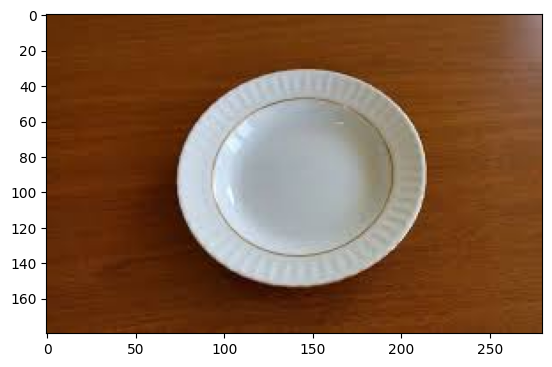

In [33]:
# Realizar la predicción con la imagen cargada
prediction = predict(image_path)

# Verificar si la predicción corresponde a un utensilio de cocina
if prediction[0] < len(clases):  # Si la predicción es dentro del rango de clases conocidas
    print(f"Predicción: El objeto es un(a) {clases[prediction[0]]}.")
else:
    print("No es un utensilio de cocina.")

import matplotlib.pyplot as plt

# Mostrar la imagen cargada
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para Matplotlib
plt.imshow(img)
plt.show()